In [5]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import re
import nltk

## We read the data first

In [6]:
def read_text(path):
    with open(path) as f:
        captions = f.read()
    return captions

captions = read_text("captions.txt")

In [7]:
len(captions.split("\n"))

40457

In [8]:
captions = captions.split("\n")[1:-1]
captions[0:5]

['1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .']

In [9]:
captions[-1]

'997722733_0cb5439472.jpg,A rock climber practices on a rock climbing wall .'

In [10]:
len(captions)

40455

Creating a dictionary that maps each image with its captions

In [11]:
descriptions = {}
for i in captions:
    x = i.split(",")[0]
    y = i.split(",")[1]
    img = x.split(".")[0]
    caption = y

    if descriptions.get(img) == None:
        descriptions[img] = []
    descriptions[img].append(caption)

In [12]:
descriptions

{'1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a gi

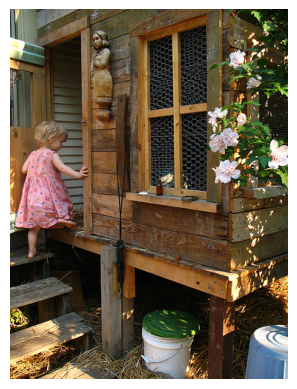

In [4]:
img_path = "D:\Python\Machine Learning\Image Captioning\Images/"
img = cv2.imread(img_path+"1000268201_693b08cb0e.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGBA)
plt.imshow(img)
plt.axis("Off")
plt.show()

---
## Data cleaning

Remove numbers, punctuations and all non-alphabatical character
Convert captions to lower case

In [14]:
def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub('[^a-z]+', ' ', sentence)
    sentence = sentence.split()

    sentence = " ".join([x for x in sentence if len(x)>1])
    return sentence

In [15]:
for key,caption in descriptions.items():
    for i in range (len(caption)):
        caption[i] = clean_text(caption[i])
descriptions

{'1000268201_693b08cb0e': ['child in pink dress is climbing up set of stairs in an entry way',
  'girl going into wooden building',
  'little girl climbing into wooden playhouse',
  'little girl climbing the stairs to her playhouse',
  'little girl in pink dress going into wooden cabin'],
 '1001773457_577c3a7d70': ['black dog and spotted dog are fighting',
  'black dog and tri colored dog playing with each other on the road',
  'black dog and white dog with brown spots are staring at each other in the street',
  'two dogs of different breeds looking at each other on the road',
  'two dogs on pavement moving toward each other'],
 '1002674143_1b742ab4b8': ['little girl covered in paint sits in front of painted rainbow with her hands in bowl',
  'little girl is sitting in front of large painted rainbow',
  'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it',
  'there is girl with pigtails sitting in front of rainbow painting',
  'young girl with p

In [16]:
with open("descriptions.txt","w+") as f:
    f.write(str(descriptions))

---
## Creating Vocab

In [10]:
import json
descriptions = None #It was a dict before
with open("descriptions.txt","r") as f:
    descriptions = f.read() # string now

json_acceptable = descriptions.replace("'","\"")
descriptions = json.loads(json_acceptable)

In [11]:
print(type(descriptions))

<class 'dict'>


In [12]:
# vocab
vocab = set()
for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]]

print("Vocab Size: ",len(vocab))

Vocab Size:  8257


In [13]:
total_words = []
for key in descriptions.keys():
    [total_words.append(i) for sen in descriptions[key] for i in sen.split()]

print("Total number of words:",len(total_words))

Total number of words: 357791


In [14]:
# filtering words from the vocab according to threshold frequency
import collections
counter = collections.Counter(total_words)
freq = dict(counter)
print(len(freq.keys()))
freq

8257


{'child': 1517,
 'in': 18193,
 'pink': 706,
 'dress': 332,
 'is': 9069,
 'climbing': 495,
 'up': 1251,
 'set': 106,
 'of': 6504,
 'stairs': 109,
 'an': 2358,
 'entry': 1,
 'way': 51,
 'girl': 3284,
 'going': 145,
 'into': 1046,
 'wooden': 278,
 'building': 485,
 'little': 1750,
 'playhouse': 6,
 'the': 17677,
 'to': 3008,
 'her': 1102,
 'cabin': 4,
 'black': 3641,
 'dog': 7958,
 'and': 8066,
 'spotted': 37,
 'are': 3365,
 'fighting': 131,
 'tri': 12,
 'colored': 204,
 'playing': 1954,
 'with': 7308,
 'each': 399,
 'other': 667,
 'on': 10369,
 'road': 389,
 'white': 3728,
 'brown': 2484,
 'spots': 28,
 'staring': 57,
 'at': 2820,
 'street': 910,
 'two': 5550,
 'dogs': 2097,
 'different': 44,
 'breeds': 5,
 'looking': 683,
 'pavement': 46,
 'moving': 40,
 'toward': 142,
 'covered': 348,
 'paint': 58,
 'sits': 561,
 'front': 1322,
 'painted': 63,
 'rainbow': 17,
 'hands': 231,
 'bowl': 29,
 'sitting': 1322,
 'large': 1210,
 'small': 1264,
 'grass': 1565,
 'plays': 515,
 'fingerpaints': 3,

In [15]:
# sorting the freq dictionary
sorted_freq = sorted(freq.items(),reverse=True,key=lambda x:x[1])
# only keeping words that have a freq more than 10
threshold = 10
sorted_freq = [x for x in sorted_freq if x[1]>threshold]
total_words = [x[0] for x in sorted_freq]

In [16]:
print(len(total_words))

1800


---
## Prepare Train Test

Adding start and end sequence in the captions to help during text generation

In [17]:
train_data = open('Flickr_8k.trainImages.txt',"r").read()
test_data =  open('Flickr_8k.testImages.txt',"r").read()

In [18]:
train_names = [lines.split('.')[0] for lines in train_data.split('\n')[:-1]]
test_names = [lines.split('.')[0] for lines in test_data.split('\n')[:-1]]

In [19]:
print('Length of Training Data',len(train_names))
print('Length of Testing Data',len(test_names))

Length of Training Data 6000
Length of Testing Data 1000


Validating the correctness of the split

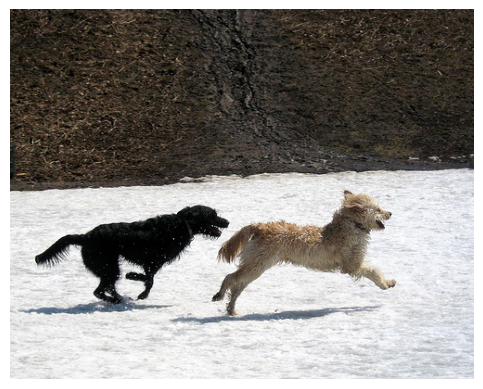

In [20]:
img_path = "D:\Python\Machine Learning\Image Captioning\Images/"
img = cv2.imread(img_path+"{}.jpg".format(train_names[0]))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGBA)
plt.imshow(img)
plt.axis("Off")
plt.show()

In [21]:
descriptions[train_names[0]]

['black dog is running after white dog in the snow',
 'black dog chasing brown dog through snow',
 'two dogs chase each other across the snowy ground',
 'two dogs play together in the snow',
 'two dogs running through low lying body of water']

In [22]:
train_descriptions = {}

for img_id in train_names:
    train_descriptions[img_id] = []
    for cap in descriptions[img_id]:
        caption = "<s> "+ cap + " <e>"
        train_descriptions[img_id].append(caption)

train_descriptions

{'2513260012_03d33305cf': ['<s> black dog is running after white dog in the snow <e>',
  '<s> black dog chasing brown dog through snow <e>',
  '<s> two dogs chase each other across the snowy ground <e>',
  '<s> two dogs play together in the snow <e>',
  '<s> two dogs running through low lying body of water <e>'],
 '2903617548_d3e38d7f88': ['<s> little baby plays croquet <e>',
  '<s> little girl plays croquet next to truck <e>',
  '<s> the child is playing croquette by the truck <e>',
  '<s> the kid is in front of car with put and ball <e>',
  '<s> the little boy is playing with croquet hammer and ball beside the car <e>'],
 '3338291921_fe7ae0c8f8': ['<s> brown dog in the snow has something hot pink in its mouth <e>',
  '<s> brown dog in the snow holding pink hat <e>',
  '<s> brown dog is holding pink shirt in the snow <e>',
  '<s> dog is carrying something pink in its mouth while walking through the snow <e>',
  '<s> dog with something pink in its mouth is looking forward <e>'],
 '4884

In [23]:
import pickle
with open('train_descriptions.pkl', 'wb') as f:
    pickle.dump(train_descriptions, f)

---
## Transfer Learning
Images --> Features

Text --> Features

## Image Feature Extraction

In [26]:
from keras.applications import ResNet50
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

For image feature extraction we need the output from [avg_pool (GlobalAveragePooling2D)   (None, 2048)]  Layer 
 

In [27]:
from keras import Model
new_model = Model(model.input,model.layers[-2].output)

Preprocessing Function

In [1]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
def preprocess_image(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Normalization
    img = preprocess_input(img)
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


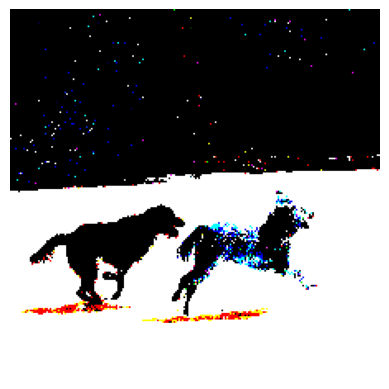

In [10]:
img = preprocess_image(img_path+"{}.jpg".format(train_names[0]))
plt.imshow(img[0])
plt.axis("Off")
plt.show()

In [ ]:
img.shape

(1, 224, 224, 3)

Encoding function

In [31]:
def encode_image(img):
    img = preprocess_image(img)
    feature_vector = new_model.predict(img)
    feature_vector = feature_vector.reshape(-1)
    # print(feature_vector.shape)
    return feature_vector

In [32]:
encode_image(img_path+"{}.jpg".format(train_names[0]))

1/1 [==============================] - 1s 1s/step


array([0.3470796 , 0.5115914 , 0.08728842, ..., 1.1897295 , 0.04043847,
       0.15271059], dtype=float32)

## Encoding all Images

## Train data

In [33]:
import pickle
from time import time
start = time()
encoding_train = {} #image_id ---> feature vector from resnet image
for ix,img_id in enumerate(train_names):
    path = img_path+"{}.jpg".format(img_id)
    encoding_train[img_id] = encode_image(path)

    if ix%100==0:
        print("Enocoding progress Time step",ix)
    
end_time = time()
print("Total time taken:",end_time-start)


1/1 [==============================] - 0s 177ms/step
Enocoding progress Time step 0
1/1 [==============================] - 0s 128ms/step
Enocoding progress Time step 100
1/1 [==============================] - 0s 112ms/step
Enocoding progress Time step 200
1/1 [==============================] - 0s 122ms/step
Enocoding progress Time step 300
1/1 [==============================] - 0s 118ms/step
Enocoding progress Time step 400
1/1 [==============================] - 0s 148ms/step
Enocoding progress Time step 500
1/1 [==============================] - 0s 113ms/step
Enocoding progress Time step 600
1/1 [==============================] - 0s 121ms/step
Enocoding progress Time step 700
1/1 [==============================] - 0s 118ms/step
Enocoding progress Time step 800
1/1 [==============================] - 0s 119ms/step
Enocoding progress Time step 900
1/1 [==============================] - 0s 123ms/step
Enocoding progress Time step 1000
1/1 [==============================] - 0s 114ms/step
En

In [34]:
with open("Encoded_train.pkl","wb") as f:
    pickle.dump(encoding_train,f)

## Test data

In [35]:
start = time()
encoding_test = {} #image_id ---> feature vector from resnet image
for ix,img_id in enumerate(test_names):
    path = img_path+"{}.jpg".format(img_id)
    encoding_test[img_id] = encode_image(path)

    if ix%100==0:
        print("Test Enocoding progress Time step",ix)
    
end_time = time()
print("Total time taken:",end_time-start)

1/1 [==============================] - 0s 130ms/step
Test Enocoding progress Time step 0
1/1 [==============================] - 0s 117ms/step
Test Enocoding progress Time step 100
1/1 [==============================] - 0s 117ms/step
Test Enocoding progress Time step 200
1/1 [==============================] - 0s 112ms/step
Test Enocoding progress Time step 300
1/1 [==============================] - 0s 118ms/step
Test Enocoding progress Time step 400
1/1 [==============================] - 0s 112ms/step
Test Enocoding progress Time step 500
1/1 [==============================] - 0s 113ms/step
Test Enocoding progress Time step 600
1/1 [==============================] - 0s 118ms/step
Test Enocoding progress Time step 700
1/1 [==============================] - 0s 115ms/step
Test Enocoding progress Time step 800
1/1 [==============================] - 0s 113ms/step
Test Enocoding progress Time step 900
1/1 [==============================] - 0s 119ms/step
Total time taken: 162.90334796905518


In [36]:
with open("Encoded_test.pkl","wb") as ft:
    pickle.dump(encoding_test,ft)

Caption Preprocessing

In [8]:
word_to_idx = {}
idx_to_word = {}
#  Done to map each word with a number
for i,word in enumerate(total_words):
    word_to_idx[word] = i+1
    idx_to_word[i+1] = word

In [9]:
#  Adding two special words <s> and <e>
idx_to_word[1801] = "<s>"
idx_to_word[1802] = "<e>"
word_to_idx["<s>"] = 1801
word_to_idx["<e>"] = 1802

vocab_size = len(idx_to_word) + 1 # +1 because for index 0
vocab_size

1803

In [10]:
import pickle 

with open('idx_to_word.pkl', 'wb') as f:
    pickle.dump(idx_to_word, f)

with open('word_to_idx.pkl', 'wb') as fs:
    pickle.dump(word_to_idx, fs)

In [17]:
max = 0
for key in train_descriptions.keys():
    for i in train_descriptions[key]:
        if len(i.split())>max:
            max = len(i.split())
max

30